# Exploratory Analysis

## Eploring SpotiPy
- Explore available data
- Select features of interest
- Generate initial dataframe and database

###### Note:
###### - Potentially building a recomender system that can take a set of the most frequently played songs from one user, and match them with a second users profile; potentially between courting couples and friends
###### - Consider doing podcasts as a feature for the people that might be interested in that
###### - Also, consider calling the playlists `"{user_1} and {user_2}'s Playlist Baby"`

In [1]:
# imports

import sys
import json
import spotipy
import webbrowser
import numpy as np
import pandas as pd
from os import getenv
import spotipy.util as util
from dotenv import load_dotenv
from json.decoder import JSONDecodeError
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth

notes: pivoting given that we cannot create two playlists for two users simultaneously
- we can create a single play list for one user given the other user's library
- so what we'll do it take the two user libraries and generate a playlist for a single user
- given the music from a second play list

In [4]:
# We are using the client Module from the Python library for the Spotify API
# (https://spotipy.readthedocs.io/en/2.13.0/#module-spotipy.client)
# Client Credentials Flow


load_dotenv()  # this imports all .env variables

# Setting up env variables to connect to API
uri = getenv('uri') # must match in the Spotify app dashboard
SPOTIFY_CLIENT_ID = getenv('SPOTIFY_CLIENT_ID')
SPOTIFY_CLIENT_SECRET = getenv('SPOTIFY_CLIENT_SECRET')
username = getenv('USER_ID')  #  user who's data we are collecting
# scope = 'playlist-modify-public'  #  determines the kind of access you have to a user profile
# scope = 'user-top-read'
scope = 'user-library-read'

# Access token to obtain user info
token = util.prompt_for_user_token(username='spotify',
                                   client_id=SPOTIFY_CLIENT_ID,
                                   client_secret=SPOTIFY_CLIENT_SECRET,
                                   scope=scope,
                                   redirect_uri=uri)

# activating spotify session
spotify_session = spotipy.Spotify(auth=token)

## Goals 
- Connect to user library using [scopes](https://developer.spotify.com/documentation/general/guides/scopes/)
- Scopes to connect to are [user-library-read](https://developer.spotify.com/documentation/general/guides/scopes/#user-library-read), [playlist-modify-public](https://developer.spotify.com/documentation/general/guides/scopes/#playlist-modify-public), and [user-top-read](https://developer.spotify.com/documentation/general/guides/scopes/#user-top-read)

##### **The goal here is to cnnect to the users' respective libraries, analyze them, and create a new playlist.**
- For this analysis I will exlpore the Audio Features Objects

# Exploring Top Tracks for a user

In [5]:
# Playing with the api: accessing user top read, modify playlist, read library

# User top artists (test)
top_artists = spotify_session.current_user_top_artists(limit=1)

# User top tracks (test)
top_tracks = spotify_session.current_user_top_tracks(limit=50, time_range='medium_term')

# Exploring Track_ids (test)
print(top_tracks['items'][0]['id'] == "0akyEssGRVHstqCSWXusJL")
top_track_id = top_tracks['items'][0]['id']

# Top ten tracks ids
top_50_tracks_id = [top_tracks['items'][x]['id'] for x in range(len(top_tracks['items']))]
print(top_50_tracks_id)

# Top track Audio Features Object
audio_feat = spotify_session.audio_features(tracks=top_50_tracks_id)

True
['0akyEssGRVHstqCSWXusJL', '02gaYAEdeR6poHcBH1KUQF', '6plO0gM4tUvRC9TKFGIuaN', '0NeJjNlprGfZpeX2LQuN6c', '54KsfVVnN4YWI2mMrnyUcC', '1s3WD4gbNoEXHiuSTmAKaK', '57mLRN6tfXwTRvp9oPWpop', '1jecO8NeYLsVWVptITz4c1', '6KseaEAFSS63N2NPZtDnRL', '52N0IV8hLVkRmnpFclmCzK', '5iSpfk6cDOSYePagAoG639', '7kWFRZdedr2gtfE8JDumVZ', '4zFPUEMucYleIIUnYVoeZf', '1IF5UcqRO42D12vYwceOY6', '2UxrK7r4cyQOSh7wvdQTe1', '17OkYffr0SdAcpcbwMkDDG', '71Mj2THXRicZhTFGzln3al', '0JfsIu62NVXNQl2s7ATN37', '0107Auhv91hE49iLoxtayt', '4cJOLN346rtOty3UPACsao', '4RNYL9drYkmWYpDyfknta9', '1sJev5Y7VI2Ke8AwUpnh0l', '1yTJg3lyUPmwbnve82twH5', '6Zy0ITa16EjCAbbGuPzdRi', '6fcS6fncRVP8rldHjriZHS', '7v3YlquaNhK2GYKzxovSEp', '3PUbNbybe6dTMWdUt9vQ02', '4OwOKRIKlO7wsDitlUN4QH', '4RrOSjdnV8rkpIuOIfkKYS', '51wUFdgpNsV8cVzu7i6N0l', '0xSqHQ5wv80hNkpU50vPc7', '2TzkIzgzIHhewMxyh1u4hh', '5ONAA8z6SvFBniu8zXz1Ax', '58iNllszkXpDOcYRgcfLfH', '6ThsXWiur66KlCzXVj9tXj', '3QIQtCPni57ZcSPzz7JDxt', '7ukRl9q1yVYO2j5SXwvjaB', '1VA0QtG2DXGF4k6fYz70PE', '2nU1H

In [6]:
# Obtainiing track-name and artist name

top_tracks.keys()
top_tracks['items'][0].keys()
top_tracks['items'][0]['name']                # Generates track name
top_tracks['items'][0]['artists'][0]['name']  # Generates artist name

'Ed Maverick'

In [7]:
# Audio Features Objects

# See the reference README file for a description of the Audio Features Objects, or explore the following link
# (https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)

# Note: 'key' is -1 if no key is detected.  Consider when training model, or processing data

# The following explores the keys of the Audio Features Object for a single track:
print("The following are the key value pairs contained in the audio features for 10 tracks:", '\n')

k_lst = list(audio_feat[0].keys())      # will eventually become the column names
lst_v_lst= []                           # a list of lists of values
for i in range(len(audio_feat)):        # for loop to run through the Audio Feat. Objects
    v_lst = []
    for _, v in audio_feat[i].items():  # for loop through the 0th item to append values
        v_lst.append(v)                 # values appended to list
    lst_v_lst.append(v_lst)             # list of values appending to list
# print(k_lst)
lst_v_lst[0]

The following are the key value pairs contained in the audio features for 10 tracks: 



[0.83,
 0.159,
 1,
 -14.461,
 1,
 0.0383,
 0.946,
 2.02e-05,
 0.362,
 0.189,
 104.95,
 'audio_features',
 '0akyEssGRVHstqCSWXusJL',
 'spotify:track:0akyEssGRVHstqCSWXusJL',
 'https://api.spotify.com/v1/tracks/0akyEssGRVHstqCSWXusJL',
 'https://api.spotify.com/v1/audio-analysis/0akyEssGRVHstqCSWXusJL',
 207400,
 4]

# Creating a DF from user's top tracks:
- Tracks Audio Features (top_tracks_df)


In [8]:
# Generating the dataframe for the tracks

# Take the two lists (K_LST, V_LST) and turn those into the dataframeh; the K_LST will be the column names
# V_LST will be the values; and they will be indexed by the track id's

top_tracks_df = pd.DataFrame(lst_v_lst, columns=k_lst)
top_tracks_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.830,0.159,1,-14.461,1,0.0383,0.946,0.000020,0.3620,0.189,104.950,audio_features,0akyEssGRVHstqCSWXusJL,spotify:track:0akyEssGRVHstqCSWXusJL,https://api.spotify.com/v1/tracks/0akyEssGRVHs...,https://api.spotify.com/v1/audio-analysis/0aky...,207400,4
1,0.726,0.125,5,-9.194,0,0.0803,0.835,0.000000,0.1310,0.277,92.230,audio_features,02gaYAEdeR6poHcBH1KUQF,spotify:track:02gaYAEdeR6poHcBH1KUQF,https://api.spotify.com/v1/tracks/02gaYAEdeR6p...,https://api.spotify.com/v1/audio-analysis/02ga...,183711,4
2,0.780,0.230,4,-12.706,1,0.0448,0.913,0.002790,0.0798,0.125,123.937,audio_features,6plO0gM4tUvRC9TKFGIuaN,spotify:track:6plO0gM4tUvRC9TKFGIuaN,https://api.spotify.com/v1/tracks/6plO0gM4tUvR...,https://api.spotify.com/v1/audio-analysis/6plO...,240307,4
3,0.658,0.179,8,-10.866,1,0.0448,0.689,0.000000,0.1700,0.191,128.128,audio_features,0NeJjNlprGfZpeX2LQuN6c,spotify:track:0NeJjNlprGfZpeX2LQuN6c,https://api.spotify.com/v1/tracks/0NeJjNlprGfZ...,https://api.spotify.com/v1/audio-analysis/0NeJ...,238560,4
4,0.770,0.325,7,-11.301,1,0.0322,0.899,0.000556,0.2200,0.721,103.085,audio_features,54KsfVVnN4YWI2mMrnyUcC,spotify:track:54KsfVVnN4YWI2mMrnyUcC,https://api.spotify.com/v1/tracks/54KsfVVnN4YW...,https://api.spotify.com/v1/audio-analysis/54Ks...,209652,4


In [9]:
# Combining 'track/artist name' and 'top_tracks_df' DataFrames and droping useless columns

# Dopping columns from 'top_tracks_df'
drop_col = ['type', 'track_href', 'analysis_url', 'uri']
top_tracks_df = top_tracks_df.drop(drop_col, axis=1)
top_tracks_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.830,0.159,1,-14.461,1,0.0383,0.946,0.000020,0.3620,0.189,104.950,0akyEssGRVHstqCSWXusJL,207400,4
1,0.726,0.125,5,-9.194,0,0.0803,0.835,0.000000,0.1310,0.277,92.230,02gaYAEdeR6poHcBH1KUQF,183711,4
2,0.780,0.230,4,-12.706,1,0.0448,0.913,0.002790,0.0798,0.125,123.937,6plO0gM4tUvRC9TKFGIuaN,240307,4
3,0.658,0.179,8,-10.866,1,0.0448,0.689,0.000000,0.1700,0.191,128.128,0NeJjNlprGfZpeX2LQuN6c,238560,4
4,0.770,0.325,7,-11.301,1,0.0322,0.899,0.000556,0.2200,0.721,103.085,54KsfVVnN4YWI2mMrnyUcC,209652,4


In [10]:
top_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      50 non-null     float64
 1   energy            50 non-null     float64
 2   key               50 non-null     int64  
 3   loudness          50 non-null     float64
 4   mode              50 non-null     int64  
 5   speechiness       50 non-null     float64
 6   acousticness      50 non-null     float64
 7   instrumentalness  50 non-null     float64
 8   liveness          50 non-null     float64
 9   valence           50 non-null     float64
 10  tempo             50 non-null     float64
 11  id                50 non-null     object 
 12  duration_ms       50 non-null     int64  
 13  time_signature    50 non-null     int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 5.6+ KB


In [11]:
# Function: Generates DataFrame with user library

# Gathering library of songs from a given user: first user here is `spotify`

In [16]:
# Getting all playlists for the user Spotify

print('''This cell gathers the playlists of a single user; will be used when getting new users''')

# playlists = spotify_session.user_playlists('spotify')
# playlist_ids = []
# while playlists:
#     for i, playlist in enumerate(playlists['items']):
#         playlist_ids.append(playlist['id'])
#     if playlists['next']:
#         playlists = spotify_session.next(playlists)
#     else:
#         playlists = None

This cell gathers the playlists of a single user; will be used when getting new users


In [18]:
# `.playlist_tracks()` method allows one to obtain all tracks in a playlist

print('''this is the method used to gather the tracks in a playlist''')

# response = spotify_session.playlist_tracks(playlist_ids[0],
#                                            offset=1,
#                                            fields='items.track.id')

this is the method used to gather the tracks in a playlist


In [19]:
# Obtaining track IDs for tracks in a playlist

print('''Note: this cell takes time to complete running; so run cautiously; only run this cell when gathering user songs''')


# trx = []
# for i in playlist_ids:
#     offset = 0
#     while True:
#         response = spotify_session.playlist_tracks(i,
#                                                    offset=offset,
#                                                    fields='items.track.id')
# #         trx.append(response['items'])
#         offset = offset + len(response['items'])
#         if len(response['items']) == 0:
#             break
#         trx.append(response['items'])

Note: this cell takes time to complete running; so run cautiously; only run this cell when gathering user songs


In [20]:
# Dropping empty lists

print('''Drops empty list''')

# for k, v in enumerate(trx):
#     if len(trx[k]) == 0:
# #         print(trx[k])
#         trx.pop(k)

Drops empty list


In [21]:
# Creating a list of track-id strings

print('''generates list of track IDs for given user playlists''')

# track_ids = []

# for lst in trx:
# #     print(lst)
#     for tracks in lst:
#         if tracks['track'] == None:
#             continue
#         track_ids.append(tracks['track']['id'])
#         print(tracks['track']['id'])

generates list of track IDs for given user playlists


In [22]:
# len(track_ids)

In [23]:
# Removing None type track ids

print('''removes Nonetype track IDs''')

# for k, track in enumerate(track_ids):
#     if track == None:
#         track_ids.pop(k)
# len(track_ids)

removes Nonetype track IDs


In [24]:
print('''authentication methods that will be used in gather all data from users''')

# # OAuth Creds
# spot_cc = spotipy.oauth2.SpotifyOAuth(username='agustinvargas',
#                                       client_id=SPOTIFY_CLIENT_ID,
#                                       client_secret=SPOTIFY_CLIENT_SECRET,
#                                       scope=scope,
#                                       redirect_uri=uri)

# # Token Access Dict
# accs_token = spot_cc.get_access_token(as_dict=True)

# # Refreshing token
# refresh_accs_token = spot_cc.refresh_access_token(accs_token['refresh_token'])

# # SpotiSesh
# spotify_session = spotipy.Spotify(auth=accs_token['access_token'])


authentication methods that will be used in gather all data from users


In [25]:
print('''not necessary''')

# pseudo code
# 
# end_offset = 0
# start_offset = 0
# while end_offset <= len(track_ids):
#     start_offset = start_offset + end_offset
#     end_offset = start_offset + 50
#     get the audio_feats for the first 50

# len(track_ids)
# j = track_ids[0]
# audio_feat_2 = spotify_session.audio_features(tracks=j)
# for _, v in audio_feat_2[0].items():
#     print(v)
# print(audio_feat_2[0])

not necessary


In [26]:
# Configureing authentication to obtain token refresh details

# OAuth Creds
spot_cc = spotipy.oauth2.SpotifyOAuth(username='agustinvargas',
                                      client_id=SPOTIFY_CLIENT_ID,
                                      client_secret=SPOTIFY_CLIENT_SECRET,
                                      redirect_uri=uri)

# Token Access Dict
accs_token = spot_cc.get_access_token(as_dict=True)

# Token Expiration boolian
token_exp = spot_cc.is_token_expired(accs_token)

# Refreshing token
refresh_accs_token = spot_cc.refresh_access_token(accs_token['refresh_token'])

/Users/flanuer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  # Remove the CWD from sys.path while we load stuff.


# Following sets of cells generate a large dataset from which to work with.  The dataset will continue to grow as the number of users grows

In [20]:
print('''Do not run this cell unless you are looking to update data of +100k song audiofeatures''')


# # Obtaining Audio Features for +100k songs

# # Client Authentication
# spotify_session = spotipy.client.Spotify(auth=accs_token['access_token'])

# # Access Token
# accs_token = spot_cc.get_access_token(as_dict=True)

# # Token Expiration Boolian
# token_exp = spot_cc.is_token_expired(accs_token)

# # The following loops over the TrackIDs (track_ids) list to obtain
# # audio features for each track

# lst_v_lst= []  # list to be populated with lists of audio features of a track
# for j in track_ids:
#     token_exp = spot_cc.is_token_expired(accs_token)           # Checks for token expiration
#     if token_exp == False:                                     # if token not expired, continue loop
#         audio_feat = spotify_session.audio_features(tracks=j)  # obtain aud_feats for song from SpotifyAPI
#         if audio_feat[0] is None:                              # if aud_feat don't exit for song skip
#             continue
#         else:
#             v_lst = []
#             for _, v in audio_feat[0].items():  # for loop through the 0th item to append values
#                 v_lst.append(v)                 # aud_feats for song appended to a list
#             lst_v_lst.append(v_lst)             # list of aud_feats appends to list of lists
#     else:
#         accs_token = spot_cc.refresh_access_token(accs_token['refresh_token'])    # If token expired, refresh token
#         token_exp = spot_cc.is_token_expired(accs_token)                          # Not really necessary
#         spotify_session = spotipy.client.Spotify(auth=accs_token['access_token']) # Set session to refreshed token

Do not run this cell unless you are looking to update data of +100k song audiofeatures


In [21]:
print('''This cell corresponds to previous cell as well, do not run uncommented''')

# # Collecting song IDs from generated aud_feat lists
# # so that we can gather accurate song title/artists
# # data frame to match

# # list to be populated with song IDs
# track_ids_aud_feat = []

# for k, v in enumerate(lst_v_lst):
#     track_ids_aud_feat.append(lst_v_lst[k][12])  # 12th index position contains ID strings
# len(track_ids_aud_feat). # 104k IDs gathered

This cell corresponds to previous cell as well, do not run uncommented


In [22]:


print('''This cell corresponds to previus cells, do not run uncommented''')


# # Generating lists containing Artist names and Track names

# # Refreshing token
# accs_token = spot_cc.refresh_access_token(accs_token['refresh_token'])
# spotify_session = spotipy.client.Spotify(auth=accs_token['access_token'])

# # Getting artist name and track name (test)
# track = spotify_session.track(track_ids_aud_feat[0])
# print(track['artists'][0]['name'])    # Generates artist name
# print(track['name'])                  # Generates track name      

# # Lists to be populated
# track_names_lst = []
# artist_names_lst = []

# # Iterating over list of track IDs (track_ids_aud_feat)
# for j in track_ids_aud_feat:
#     token_exp = spot_cc.is_token_expired(accs_token)
#     if token_exp == False:
#         track = spotify_session.track(j)
#         track_names_lst.append(track['name'])
#         artist_names_lst.append(track['artists'][0]['name'])
#     else:
#         accs_token = spot_cc.refresh_access_token(accs_token['refresh_token'])
#         token_exp = spot_cc.is_token_expired(accs_token)
#         spotify_session = spotipy.client.Spotify(auth=accs_token['access_token'])

This cell corresponds to previus cells, do not run uncommented


In [53]:
print("""Here we can simply import the CSV file created from all of the gathered song's aud_feats, titles, and artist names""")



# # DataFrame containing artists names and track names
# full_track_artist_names = pd.DataFrame(list(zip(track_names_lst, artist_names_lst)), columns=['track name', 'artist'])
# full_track_artist_names.head(3)

Here we can simply import the CSV file created from all of the gathered song's aud_feats, titles, and artist names


In [23]:
print('''This was the resulting dataframe from the gathered song data''')

# DataFrame from the obtained audio features
# full_df = pd.DataFrame(lst_v_lst, columns=k_lst)

This was the resulting dataframe from the gathered song data


# Importing newly generated song data from corresponding CSV files
- full_track_artist_names: composed of track names corresponding to Audio Features generated amanually (see previous commented out cells)
- full_df: contains all Audio Features for over 100k songs
- songs_100_df: contains dataset found online that contains same parameters

In [154]:
# Importing CSV files of +200k songs

full_df = pd.read_csv('/Users/flanuer/Downloads/Lambda/Course_material/misc_datasets/100k_song_aud_feat.csv', index_col='id')
drop_col = ['uri', 'Unnamed: 0']
full_df = full_df.drop(drop_col, axis=1)
full_df.head()

drop_cols = ['track name', 'artist', 'uri', 'Unnamed: 0']
songs_100_df = pd.read_csv('/Users/flanuer/Downloads/Lambda/Course_material/misc_datasets/songs100k.csv', index_col='id')
songs_100_df = songs_100_df.drop(drop_cols, axis=1)
songs_100_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,
2RM4jf1Xa9zPgMGRDiht8O,0.743,0.339,1,-7.678,1,0.4090,0.005820,0.000,0.0812,0.118,203.927,238373,4
1tHDG53xJNGsItRA3vfVgs,0.846,0.557,8,-7.259,1,0.4570,0.024400,0.000,0.2860,0.371,159.009,214800,4
6Wosx2euFPMT14UXiWudMy,0.603,0.723,9,-5.890,0,0.0454,0.025000,0.000,0.0824,0.382,114.966,138913,4
3J2Jpw61sO7l6Hc7qdYV91,0.800,0.579,5,-12.118,0,0.0701,0.029400,0.912,0.0994,0.641,123.003,125381,4
2jbYvQCyPgX3CdmAzeVeuS,0.783,0.792,7,-10.277,1,0.0661,0.000035,0.878,0.0332,0.928,120.047,124016,4


In [155]:
# Joining full_df and songs_100_df

df = pd.concat([full_df, songs_100_df])
# df = df.set_index('id')
df.shape

(234807, 13)

In [156]:
print('''No need to do anything here.''')
# Exporting dataframe of +100k songs to csv file
# full_df.to_csv(r'/Users/flanuer/Downloads/Lambda/Course_material/misc_datasets/100k_song_aud_feat.csv')
# full_track_artist_names.to_csv(r'/Users/flanuer/Downloads/Lambda/Course_material/misc_datasets/100k_song_names.csv')

No need to do anything here.


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234807 entries, 0v1x6rN6JHRapa03JElljE to 7LNtyuekYHiZ99UxkrfCQR
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      234807 non-null  float64
 1   energy            234807 non-null  float64
 2   key               234807 non-null  int64  
 3   loudness          234807 non-null  float64
 4   mode              234807 non-null  int64  
 5   speechiness       234807 non-null  float64
 6   acousticness      234807 non-null  float64
 7   instrumentalness  234807 non-null  float64
 8   liveness          234807 non-null  float64
 9   valence           234807 non-null  float64
 10  tempo             234807 non-null  float64
 11  duration_ms       234807 non-null  int64  
 12  time_signature    234807 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 25.1+ MB


In [158]:
# df.dropna(inplace=True)
df.isna().value_counts()

danceability  energy  key    loudness  mode   speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  time_signature
False         False   False  False     False  False        False         False             False     False    False  False        False             234807
dtype: int64

In [160]:
# Need to drop speechiness

# top_tracks_df = top_tracks_df.set_index('id')
top_tracks_df.head()
top_tracks_df.isna().value_counts()

danceability  energy  key    loudness  mode   speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  time_signature
False         False   False  False     False  False        False         False             False     False    False  False        False             50
dtype: int64

# Baseline Explorations (ML)
- Select type of problem type (class/reg)
- Determine model baselines
- Model evaluations/comparisons

#### Note: Modeel takes in Audio Features of one user, and attempts to predict the songs of the other user; the resulting song IDs are used to generate a playlist

In [161]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, LabelEncoder

In [162]:
# Setting up train, test, and val sets

target = df.index
features = ['danceability',
            'energy',
            'key',
            'loudness',
            'mode',
            'speechiness',
            'acousticness',
            'instrumentalness',
            'liveness',
            'valence',
            'tempo',
            'duration_ms',
            'time_signature']

# Splitting DF into target and features 
y = target
X = df[features]

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5, random_state=42)

# Splitting the DFs
y_top = top_tracks_df.index
X_top = top_tracks_df[features]

# User library
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.8)

In [163]:
# Check
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((140884, 13), (46961, 13), (46962, 13), (140884,), (46961,), (46962,))

In [179]:
scaled_data = StandardScaler().fit_transform(df)
scaled_data.shape

(234807, 13)

In [180]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

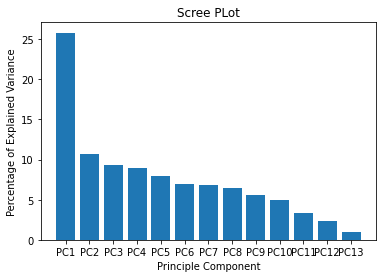

In [181]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principle Component')
plt.title('Scree PLot')
plt.show()

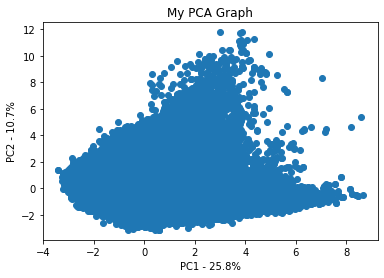

In [182]:
pca_df = pd.DataFrame(pca_data, index=df.index, columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# for sample in pca_df.index:
#     plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [183]:
loading_scores = pd.Series(pca.components_[0], index=features)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top = sorted_loading_scores[:].index.values
print(loading_scores[top])

loudness           -0.477229
energy             -0.464081
acousticness        0.428778
danceability       -0.322833
valence            -0.312501
instrumentalness    0.298216
tempo              -0.189330
time_signature     -0.180304
duration_ms         0.082316
liveness           -0.064008
mode                0.047283
key                -0.027475
speechiness         0.001222
dtype: float64


In [44]:
pipeline_nn = make_pipeline(SimpleImputer(),
                            StandardScaler(),
                            NearestNeighbors()
                           )

In [158]:
# nbrs = NearestNeighbors(n_neighbors=10).fit(X_train)

In [162]:
# distances, indeces = nbrs.kneighbors(X_test_top)


In [251]:
# tracks = []
# for i in indeces:
# #     print(i[0])
#     tracks.append(df['id'][i[0]])
# #     tracks.append(df['id'][i[1]])

In [4]:
load_dotenv()

SPOTIFY_CLIENT_ID = getenv('SPOTIFY_CLIENT_ID')
SPOTIFY_CLIENT_SECRET = getenv('SPOTIFY_CLIENT_SECRET')
uri = getenv('uri')

lib_read = 'user-library-read'  # Gets user's saved tracks
user_top = 'user-top-read'      # Gets user's top saved tracks/artists
pub_playlist = 'playlist-modify-public'  # Creates playlist, adds items to playlist
scope = [lib_read, user_top, pub_playlist]


# OAuth Creds
spot_cc = spotipy.oauth2.SpotifyOAuth(username='37t3cvb5u3o97hin4bsj40abw',
                                      client_id=SPOTIFY_CLIENT_ID,
                                      client_secret=SPOTIFY_CLIENT_SECRET,
#                                       scope=scope[0],  # scope allows access to user lib
#                                       scope=scope[1],  # scope allows access to user's top interests
                                      scope=scope[2],  # scope allows acces for creating a playlist
                                      redirect_uri=uri)



# token = util.prompt_for_user_token(username='37t3cvb5u3o97hin4bsj40abw',
#                                    client_id=SPOTIFY_CLIENT_ID,
#                                    client_secret=SPOTIFY_CLIENT_SECRET,
#                                    scope=user_top_scope,
#                                    redirect_uri=uri)

# activate session with user
# spotify_session = spotipy.Spotify(auth=token)

# # Token Access Dict
accs_token = spot_cc.get_access_token()


# # Refreshing token
refresh_accs_token = spot_cc.refresh_access_token(accs_token['refresh_token'])

# SpotiSesh
spotify_session = spotipy.Spotify(auth=accs_token)

/Users/flanuer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.


# You can use the following cell to access any given user's top 50 tracks

In [6]:
# NOTE: Once a user logs on to your app, and allows it access given the different kinds of 
# scopes, we will be able to use the following code below to obtain the user's top tracks

load_dotenv()
client_secret = getenv('SPOTIFY_CLIENT_SECRET')
client_id = getenv('SPOTIFY_CLIENT_ID')
uri = getenv('uri')
user_top_scope = 'user-top-read'

token = util.prompt_for_user_token(username='',
#                                    username='agustinvargas',
#                                    username='gabriela_ayala19',
#                                    username='dintherye',
                                   client_id=client_id,
                                   client_secret=client_secret,
                                   scope=user_top_scope,
                                   redirect_uri=uri)

# spotify:user:gabriela_ayala19
# spotify:user:dintherye

# activate session with user
spot_session = spotipy.Spotify(auth=token)

top_tracks = spot_session.current_user_top_tracks(limit=50, time_range='medium_term')
top_50_tracks_ids = [top_tracks['items'][x]['id'] for x in range(len(top_tracks['items']))]
print(top_50_tracks_ids)

['0akyEssGRVHstqCSWXusJL', '02gaYAEdeR6poHcBH1KUQF', '0NeJjNlprGfZpeX2LQuN6c', '6plO0gM4tUvRC9TKFGIuaN', '54KsfVVnN4YWI2mMrnyUcC', '5iSpfk6cDOSYePagAoG639', '6KseaEAFSS63N2NPZtDnRL', '1jecO8NeYLsVWVptITz4c1', '1s3WD4gbNoEXHiuSTmAKaK', '57mLRN6tfXwTRvp9oPWpop', '52N0IV8hLVkRmnpFclmCzK', '4zFPUEMucYleIIUnYVoeZf', '1IF5UcqRO42D12vYwceOY6', '4cJOLN346rtOty3UPACsao', '2UxrK7r4cyQOSh7wvdQTe1', '0107Auhv91hE49iLoxtayt', '7kWFRZdedr2gtfE8JDumVZ', '17OkYffr0SdAcpcbwMkDDG', '0JfsIu62NVXNQl2s7ATN37', '71Mj2THXRicZhTFGzln3al', '6Zy0ITa16EjCAbbGuPzdRi', '1sJev5Y7VI2Ke8AwUpnh0l', '4RNYL9drYkmWYpDyfknta9', '7v3YlquaNhK2GYKzxovSEp', '1yTJg3lyUPmwbnve82twH5', '51wUFdgpNsV8cVzu7i6N0l', '4RrOSjdnV8rkpIuOIfkKYS', '3PUbNbybe6dTMWdUt9vQ02', '6fcS6fncRVP8rldHjriZHS', '0xSqHQ5wv80hNkpU50vPc7', '2TzkIzgzIHhewMxyh1u4hh', '3PVgZvHQdNJHR0ZLN1u8vn', '4OwOKRIKlO7wsDitlUN4QH', '5ONAA8z6SvFBniu8zXz1Ax', '3QIQtCPni57ZcSPzz7JDxt', '58iNllszkXpDOcYRgcfLfH', '4utNmwmHfwvzPBT3kMtwEN', '1VA0QtG2DXGF4k6fYz70PE', '2nU1HJ8GcM

In [10]:
print('This cell generates a list of names of the top 50 tracks for a given user')

# spot_tracks = []

# for k, v in enumerate(top_50_tracks_ids):
#     spot_tracks.append(spot_session.tracks([v]))
#     print(spot_tracks[k]['tracks'][0]['name'])

This cell generates a list of names of the top 50 tracks for a given user


In [58]:
print('this cell generates a list of the external urls and names of the tracks')

# for i in spot_tracks['tracks']:
#     print(i['name'])
#     print(i['external_urls'])

this cell generates a list of the external urls and names of the tracks


In [85]:
# testing cell

import json
import base64
import datetime
from os import getenv
import spotipy
from dotenv import load_dotenv
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth


load_dotenv()
# Configureing authentication to obtain token refresh details

# App ID
SPOTIFY_CLIENT_ID = getenv('SPOTIFY_CLIENT_ID')
SPOTIFY_CLIENT_SECRET = getenv('SPOTIFY_CLIENT_SECRET')
uri = getenv('uri')

lib_read = 'user-library-read'           # Gets user's saved tracks
user_top = 'user-top-read'               # Gets user's top saved tracks/artists
pub_playlist = 'playlist-modify-public'  # Creates playlist, adds items to playlist
scope = [lib_read, user_top, pub_playlist]

# OAuth Creds
spot_cc = spotipy.oauth2.SpotifyOAuth(username='agustinvargas',
                                      client_id=SPOTIFY_CLIENT_ID,
                                      client_secret=SPOTIFY_CLIENT_SECRET,
                                      scope=scope[1],
                                      redirect_uri=uri)

# Token Access Dict
accs_token = spot_cc.get_access_token(as_dict=True)
# print(accs_token)

# Token Expiration boolian
token_exp = spot_cc.is_token_expired(accs_token)
print(token_exp)

# Refreshing token
refresh_accs_token = spot_cc.refresh_access_token(accs_token['refresh_token'])





            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        


/Users/flanuer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.


Opened https://accounts.spotify.com/authorize?client_id=933b2272683d4796a86dd9a524514edb&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8888%2Flab&scope=user-top-read in your browser




Enter the URL you were redirected to:  http://localhost:8888/lab/workspaces/auto-f?code=AQDU0dzgfI-Y1EaxNgprJrQuhrCgogaEFVOWuwqY3WlwquCr68YnXtJ4Yc5CjiID-f2KlZGZxsxJmIlIDWluKaDxKmcrMhu-w0ERPpNruuLCE1O08KU37m9pR7gdFPiw-Ff_axWzoi7tk05V03za3ZwIGcUXAPC0J0vEuGam3jykhuGXzwxss7zgAKE




False


In [17]:
top_tracks = spotify_session.current_user_top_tracks(limit=50, time_range='medium_term')
top_50_tracks_id = [top_tracks['items'][x]['id'] for x in range(len(top_tracks['items']))]

In [75]:
some_var = 'STRING OF WORDS'
another_var = 'MORE STRING OF WORDS'

class Test:
    yet_another_var = 'DOES THIS WORK'
    lib_read_scope = 'user-library-read'           # Gets user's saved tracks
    user_top_scope = 'user-top-read'               # Gets user's top saved tracks/artists
    pub_playlist_scope = 'playlist-modify-public'  # Creates playlist, adds items to playlist
    scope = [lib_read, user_top, pub_playlist]
    
    def __init__(self):
        self.var1 = some_var
        self.var2 = another_var
        self.var3 = self.yet_another_var
        self.scope = self.scope
        
    def first_funct(self, someones_name=None, another_persons_name=None):
        someones_name = someones_name
        another_persons_name = another_persons_name
        what_is_this = self.yet_another_var
        more_stuff = self.var3
        return print(f'{someones_name} wrote a {self.var1}, and {another_persons_name} wrote {self.var2}, {what_is_this}, and {more_stuff}')
    
    def scopes(self, scope=None, user1=None, user2=None):
        user1 = 'david'
        user2 = 'kevin'
        scope = self.scope[0]
        tst = self.first_funct(user1, user2)
        return print(scope, tst)

In [76]:
the_test = Test()
the_test.first_funct(someones_name='CODY', another_persons_name='JACOB')
the_test.scopes()

CODY wrote a STRING OF WORDS, and JACOB wrote MORE STRING OF WORDS, DOES THIS WORK, and DOES THIS WORK
david wrote a STRING OF WORDS, and kevin wrote MORE STRING OF WORDS, DOES THIS WORK, and DOES THIS WORK
user-library-read None


In [82]:
user1 = None
user2 = None

if user1 is None and user2 is None:
    print("They're both none")
elif user1 == None or user2 == None:
    print('missing one user')
else:
    print('idk what is going on')

They're both none
